In [18]:
# Import Python modules
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [19]:
def load_zillow_data_rental(state=None,county=None,region=None,city=None):
    '''
    This function creates a dataframe for whatever city you define.
    The dataframe will have a "Date" column and then it will also have  
    columns for median rental prices and columns for median house prices 
    and it will all be broken down according to the number of bedrooms 
    or according to the type of the unit.
    '''
    # Make a dictionary of file paths
    dictionary_with_file_paths = {'kaggle/input/zillow-house-price-data/DaysOnZillow_City.csv' : 'DaysOnZillow_City',
    'kaggle/input/zillow-house-price-data/Sale_Prices_City.csv' : 'Sale_Prices_City',
    'kaggle/input/zillow-house-price-data/City_MedianRentalPrice_Studio.csv' : 'City_MedianRentalPrice_Studio',
    'kaggle/input/zillow-house-price-data/City_MedianRentalPrice_1Bedroom.csv' : 'City_MedianRentalPrice_1Bedroom',
    'kaggle/input/zillow-house-price-data/City_MedianRentalPrice_2Bedroom.csv' : 'City_MedianRentalPrice_2Bedroom',
    'kaggle/input/zillow-house-price-data/City_MedianRentalPrice_3Bedroom.csv' : 'City_MedianRentalPrice_3Bedroom',
    'kaggle/input/zillow-house-price-data/City_MedianRentalPrice_4Bedroom.csv' : 'City_MedianRentalPrice_4Bedroom',
    'kaggle/input/zillow-house-price-data/City_MedianRentalPrice_5BedroomOrMore.csv' : 'City_MedianRentalPrice_5BedroomOrMore',
    'kaggle/input/zillow-house-price-data/City_Zhvi_1bedroom.csv' : 'City_Zhvi_1bedroom',
    'kaggle/input/zillow-house-price-data/City_Zhvi_2bedroom.csv' : 'City_Zhvi_2bedroom',
    'kaggle/input/zillow-house-price-data/City_Zhvi_3bedroom.csv' : 'City_Zhvi_3bedroom',
    'kaggle/input/zillow-house-price-data/City_Zhvi_4bedroom.csv' : 'City_Zhvi_4bedroom',
    'kaggle/input/zillow-house-price-data/City_Zhvi_5BedroomOrMore.csv' : 'City_Zhvi_5BedroomOrMore',
    'kaggle/input/zillow-house-price-data/City_Zhvi_AllHomes.csv' : 'City_Zhvi_AllHomes',
    'kaggle/input/zillow-house-price-data/City_Zhvi_SingleFamilyResidence.csv' : 'City_Zhvi_SingleFamilyResidence',
    'kaggle/input/zillow-house-price-data/City_Zhvi_Condominum.csv' : 'City_Zhvi_Condominum',}

    # Load the files from the file paths into a dictionary of dataframes
    dictionary_with_dataframes = {}
    for file_path, file_name in dictionary_with_file_paths.items():
        name_of_dataframe = str(file_name)
        dictionary_with_dataframes[name_of_dataframe] = pd.read_csv(file_path)
        dictionary_with_dataframes[name_of_dataframe].rename(columns={'Unnamed: 0':'which_measurement'}, inplace=True)
        dictionary_with_dataframes[name_of_dataframe]['which_measurement'] = name_of_dataframe

    # Combine the dataframes into one large dataframe that has a new column that labels each subsection
    filtered_dataframe = pd.concat(dictionary_with_dataframes.values(), ignore_index=True, sort=True)

    # Filter the data according to your needs
    states_to_keep = [state]
    counties_to_keep = [county]
    regions_to_keep = [region]
    cities_to_keep = [city]
    if state == None:
        pass
    else:
        filtered_dataframe = filtered_dataframe[filtered_dataframe.State.isin(states_to_keep)] #StateName?
    if county == None:
        pass
    else:    
        filtered_dataframe = filtered_dataframe[filtered_dataframe.CountyName.isin(counties_to_keep)]
    if region == None:
        pass
    else:     
        filtered_dataframe = filtered_dataframe[filtered_dataframe.RegionName.isin(regions_to_keep)]
    if city == None:
        pass
    else:     
        filtered_dataframe = filtered_dataframe[filtered_dataframe.Metro.isin(cities_to_keep)]

    # Reshape the data
    for row in filtered_dataframe:
        final_df = filtered_dataframe[['2008-03','2008-04','2008-05','2008-06',
               '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
               '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
               '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12',
               '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
               '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
               '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
               '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
               '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
               '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
               '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
               '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
               '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
               '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
               '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
               '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
               '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
               '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
               '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
               '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
               '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
               '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
               '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
               '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
               '2020-01','2020-02','2020-03',#,'2020-04','2020-05','2020-06',
               'which_measurement']]
        column_title = final_df['which_measurement'].values
        final_df = final_df.T[:-1]#.fillna(0)
        final_df.columns = [column_title]
    final_df.columns = ['City_MedianRentalPrice_Studio','City_MedianRentalPrice_1Bedroom',
                          'City_MedianRentalPrice_2Bedroom','City_MedianRentalPrice_3Bedroom',
                          'City_Zhvi_1bedroom','City_Zhvi_2bedroom','City_Zhvi_3bedroom',
                          'City_Zhvi_4bedroom','City_Zhvi_5BedroomOrMore','City_Zhvi_AllHomes',
                          'City_Zhvi_SingleFamilyResidence','City_Zhvi_Condominum']
#     final_df.columns = ['City_MedianRentalPrice_Studio','City_MedianRentalPrice_1Bedroom',
#                           'City_MedianRentalPrice_2Bedroom','City_MedianRentalPrice_3Bedroom']
    final_df['Date'] = final_df.index
    return final_df

def load_zillow_data_house(state=None,county=None,region=None,city=None):
    '''
    This function creates a dataframe for whatever city you define.
    The dataframe will have a "Date" column and then it will also have  
    columns for median rental prices and columns for median house prices 
    and it will all be broken down according to the number of bedrooms 
    or according to the type of the unit.
    '''
    # Make a dictionary of file paths
    dictionary_with_file_paths = {'kaggle/input/zillow-house-price-data/DaysOnZillow_City.csv' : 'DaysOnZillow_City',
    'kaggle/input/zillow-house-price-data/Sale_Prices_City.csv' : 'Sale_Prices_City',
    'kaggle/input/zillow-house-price-data/City_MedianRentalPrice_Studio.csv' : 'City_MedianRentalPrice_Studio',
    'kaggle/input/zillow-house-price-data/City_MedianRentalPrice_1Bedroom.csv' : 'City_MedianRentalPrice_1Bedroom',
    'kaggle/input/zillow-house-price-data/City_MedianRentalPrice_2Bedroom.csv' : 'City_MedianRentalPrice_2Bedroom',
    'kaggle/input/zillow-house-price-data/City_MedianRentalPrice_3Bedroom.csv' : 'City_MedianRentalPrice_3Bedroom',
    'kaggle/input/zillow-house-price-data/City_MedianRentalPrice_4Bedroom.csv' : 'City_MedianRentalPrice_4Bedroom',
    'kaggle/input/zillow-house-price-data/City_MedianRentalPrice_5BedroomOrMore.csv' : 'City_MedianRentalPrice_5BedroomOrMore',
    'kaggle/input/zillow-house-price-data/City_Zhvi_1bedroom.csv' : 'City_Zhvi_1bedroom',
    'kaggle/input/zillow-house-price-data/City_Zhvi_2bedroom.csv' : 'City_Zhvi_2bedroom',
    'kaggle/input/zillow-house-price-data/City_Zhvi_3bedroom.csv' : 'City_Zhvi_3bedroom',
    'kaggle/input/zillow-house-price-data/City_Zhvi_4bedroom.csv' : 'City_Zhvi_4bedroom',
    'kaggle/input/zillow-house-price-data/City_Zhvi_5BedroomOrMore.csv' : 'City_Zhvi_5BedroomOrMore',
    'kaggle/input/zillow-house-price-data/City_Zhvi_AllHomes.csv' : 'City_Zhvi_AllHomes',
    'kaggle/input/zillow-house-price-data/City_Zhvi_SingleFamilyResidence.csv' : 'City_Zhvi_SingleFamilyResidence',
    'kaggle/input/zillow-house-price-data/City_Zhvi_Condominum.csv' : 'City_Zhvi_Condominum',}

    # Load the files from the file paths into a dictionary of dataframes
    dictionary_with_dataframes = {}
    for file_path, file_name in dictionary_with_file_paths.items():
        name_of_dataframe = str(file_name)
        dictionary_with_dataframes[name_of_dataframe] = pd.read_csv(file_path)
        dictionary_with_dataframes[name_of_dataframe].rename(columns={'Unnamed: 0':'which_measurement'}, inplace=True)
        dictionary_with_dataframes[name_of_dataframe]['which_measurement'] = name_of_dataframe

    # Combine the dataframes into one large dataframe that has a new column that labels each subsection
    filtered_dataframe = pd.concat(dictionary_with_dataframes.values(), ignore_index=True, sort=True)

    # Filter the data according to your needs
    states_to_keep = [state]
    counties_to_keep = [county]
    regions_to_keep = [region]
    cities_to_keep = [city]
    if state == None:
        pass
    else:
        filtered_dataframe = filtered_dataframe[filtered_dataframe.StateName.isin(states_to_keep)] 
    if county == None:
        pass
    else:    
        filtered_dataframe = filtered_dataframe[filtered_dataframe.CountyName.isin(counties_to_keep)]
    if region == None:
        pass
    else:     
        filtered_dataframe = filtered_dataframe[filtered_dataframe.RegionName.isin(regions_to_keep)]
    if city == None:
        pass
    else:     
        filtered_dataframe = filtered_dataframe[filtered_dataframe.Metro.isin(cities_to_keep)]

    # Reshape the data
    for row in filtered_dataframe:
        final_df = filtered_dataframe[['2008-03-31','2008-04-30','2008-05-31',
       '2008-06-30', '2008-07-31', '2008-08-31', '2008-09-30',
       '2008-10-31', '2008-11-30', '2008-12-31', '2009-01-31',
       '2009-02-28', '2009-03-31', '2009-04-30', '2009-05-31',
       '2009-06-30', '2009-07-31', '2009-08-31', '2009-09-30',
       '2009-10-31', '2009-11-30', '2009-12-31', '2010-01-31',
       '2010-02-28', '2010-03-31', '2010-04-30', '2010-05-31',
       '2010-06-30', '2010-07-31', '2010-08-31', '2010-09-30',
       '2010-10-31', '2010-11-30', '2010-12-31', '2011-01-31',
       '2011-02-28', '2011-03-31', '2011-04-30', '2011-05-31',
       '2011-06-30', '2011-07-31', '2011-08-31', '2011-09-30',
       '2011-10-31', '2011-11-30', '2011-12-31', '2012-01-31',
       '2012-02-29', '2012-03-31', '2012-04-30', '2012-05-31',
       '2012-06-30', '2012-07-31', '2012-08-31', '2012-09-30',
       '2012-10-31', '2012-11-30', '2012-12-31', '2013-01-31',
       '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31',
       '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30',
       '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31',
       '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31',
       '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30',
       '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
       '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
       '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30',
       '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31',
       '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31',
       '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
       '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
       '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31',
       '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30',
       '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
       '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
       '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
       '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
       '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
       '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
       '2020-02-29', '2020-03-31',#,'2020-04-30','2020-05-31','2020-06-30',
       'which_measurement']]
        column_title = final_df['which_measurement'].values
        final_df = final_df.T[:-1]#.fillna(0)
        final_df.columns = [column_title]
    final_df.columns = [#'City_MedianRentalPrice_Studio','City_MedianRentalPrice_1Bedroom',
                        #  'City_MedianRentalPrice_2Bedroom','City_MedianRentalPrice_3Bedroom',
                          'City_Zhvi_1bedroom','City_Zhvi_2bedroom','City_Zhvi_3bedroom',
                          'City_Zhvi_4bedroom','City_Zhvi_5BedroomOrMore','City_Zhvi_AllHomes',
                          'City_Zhvi_SingleFamilyResidence','City_Zhvi_Condominum']
    final_df['Date'] = final_df.index
    return final_df

def plot_seven_columns_using_plotly_regular(dataframe,column_one,column_two,column_three,column_four,column_five,column_six,column_seven,title):    
    '''
    This function plots seven numerical columns against a date column.
    It using the regular plotly library instead of plotly express.
    '''
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_one],
                        mode='lines+markers',name=column_one))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_two],
                        mode='lines+markers',name=column_two))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_three],
                        mode='lines+markers',name=column_three))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_four],
                        mode='lines+markers',name=column_four))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_five],
                        mode='lines+markers',name=column_five))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_six],
                        mode='lines+markers',name=column_six))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_seven],
                        mode='lines+markers',name=column_seven))
    fig.update_layout(title={'text':title},
                      xaxis_title='Date',yaxis_title='Median Price ($USD)',
                      legend_orientation="h",showlegend=True)
    fig.show()

def plot_seven_columns_using_plotly_express(dataframe,column_one,column_two,column_three,column_four,column_five,column_six,column_seven,title):    
    '''
    This function plots seven numerical columns against a date column.
    It using the plotly express library instead of the normal plotly library.
    '''
    df_melt = dataframe.melt(id_vars='Date', value_vars=[column_one,column_two,column_three,column_four,column_five,column_six,column_seven])
    fig = px.line(df_melt, x="Date", y="value", color="variable",title=title).update(layout=dict(xaxis_title='Date',yaxis_title='Median Price ($USD)',legend_orientation="h",showlegend=True))
    fig.show()

def plot_four_columns_using_plotly_regular(dataframe,column_one,column_two,column_three,column_four,title,lower_axis_limit,upper_axis_limit):    
    '''
    This function plots four numerical columns against a date column.
    It using the regular plotly library instead of plotly express.
    '''
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_one],
                        mode='lines+markers',name=column_one))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_two],
                        mode='lines+markers',name=column_two))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_three],
                        mode='lines+markers',name=column_three))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_four],
                        mode='lines+markers',name=column_four))
    fig.update_layout(title={'text':title},
                      xaxis_title='Date',yaxis_title='Median Price ($USD)',
                      legend_orientation="h",showlegend=True)
    fig.update_layout(xaxis=dict(range=[lower_axis_limit,upper_axis_limit]))
    fig.show()    
    
def plot_four_columns_using_plotly_express(dataframe,column_one,column_two,column_three,column_four,title,lower_axis_limit,upper_axis_limit):
    '''
    This function plots four numerical columns against a date column.
    It using the plotly express library instead of the normal plotly library.
    '''
    df_melt = dataframe.melt(id_vars='Date', value_vars=[column_one,column_two,column_three,column_four])
    fig = px.line(df_melt, x="Date", y="value", color="variable",title=title).update(layout=dict(xaxis_title='Date',yaxis_title='Median Price ($USD)',legend_orientation="h",showlegend=True))
    fig.update_xaxes(range=[lower_axis_limit,upper_axis_limit])
    fig.show()

In [20]:
# Load and plot the data for the state, county, region, or city that you are interested in.  
boulder_df_rental = load_zillow_data_rental(state='CO',county='Boulder County', region='Boulder',city='Boulder')
boulder_df_house = load_zillow_data_house(state='CO',county='Boulder County', region='Boulder',city='Boulder')

<Axes: title={'center': 'Median Prices of Homes and Rental Units in Boulder, CO'}>

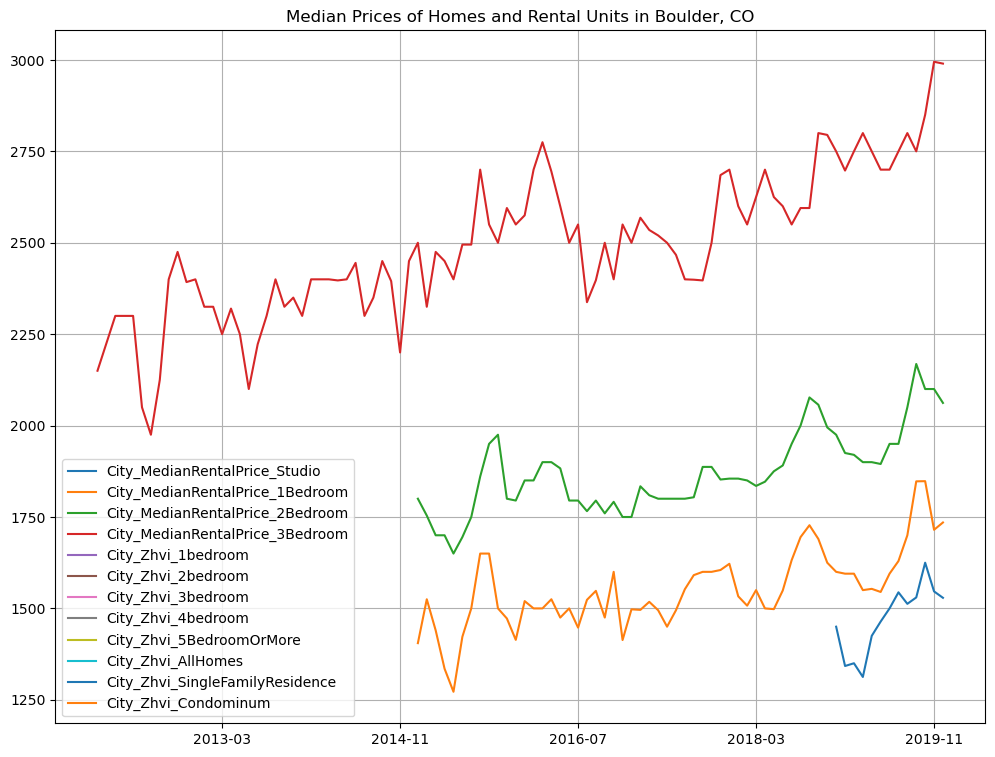

In [21]:
boulder_df_rental.plot(title='Median Prices of Homes and Rental Units in Boulder, CO',figsize=(12,9), grid=True)